In [ ]:
!unzip items.zip

In [2]:
! pip install tensorflow

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train and evaluate multiple supervised models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load the Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Flatten the images and normalize pixel values
X_train_full = X_train_full.reshape(X_train_full.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Use the entire dataset for training
X_train = X_train_full
y_train = y_train_full

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'AUC': roc_auc_score(y_test, y_proba, multi_class='ovr') if y_proba is not None and y_proba.ndim > 1 else 'N/A'
    }
    results.append(metrics)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score       AUC
0  Logistic Regression    0.7972   0.797849  0.7972  0.797288  0.970087
1        Decision Tree    0.7481   0.749920  0.7481  0.748898  0.860056
2        Random Forest    0.8505   0.850107  0.8505  0.848844  0.985586
3                  SVM    0.8511   0.850335  0.8511  0.850264  0.986410


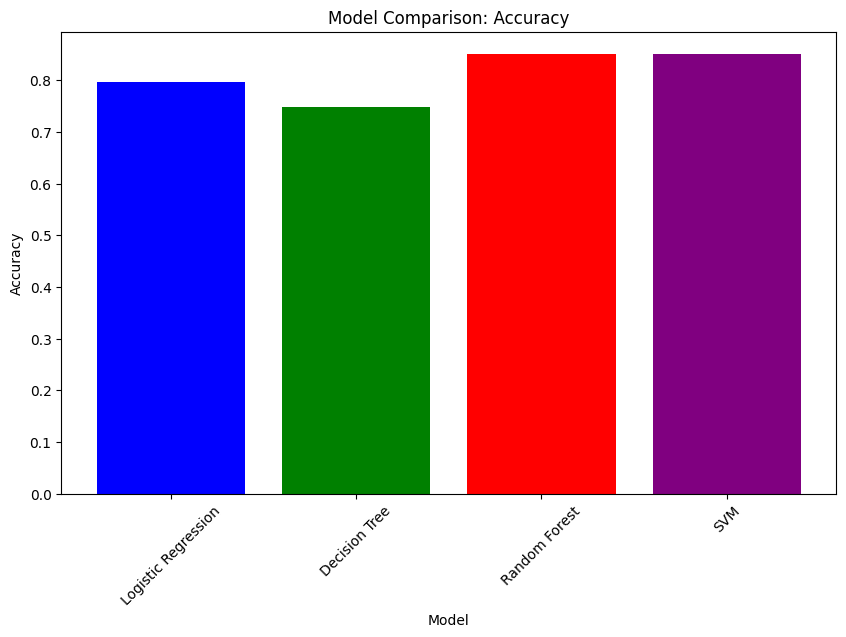

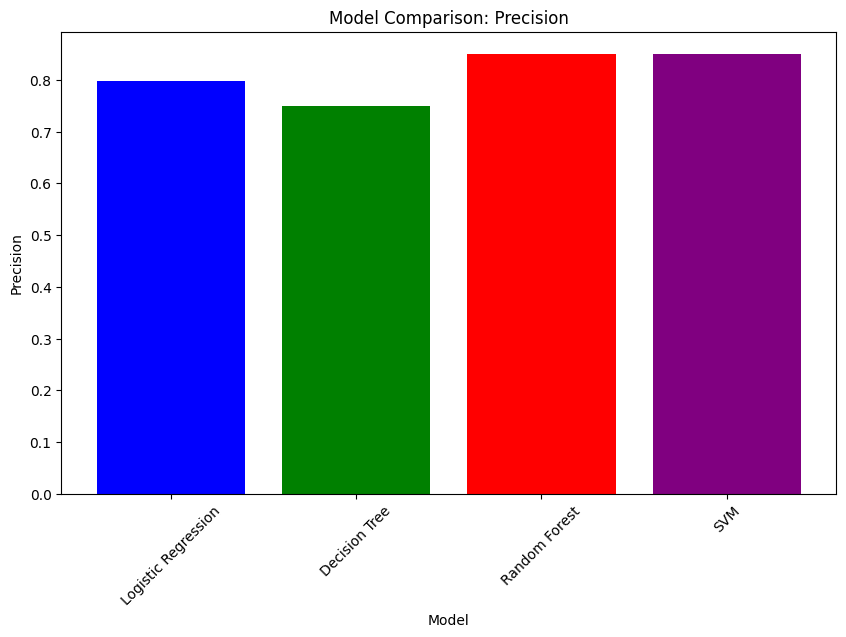

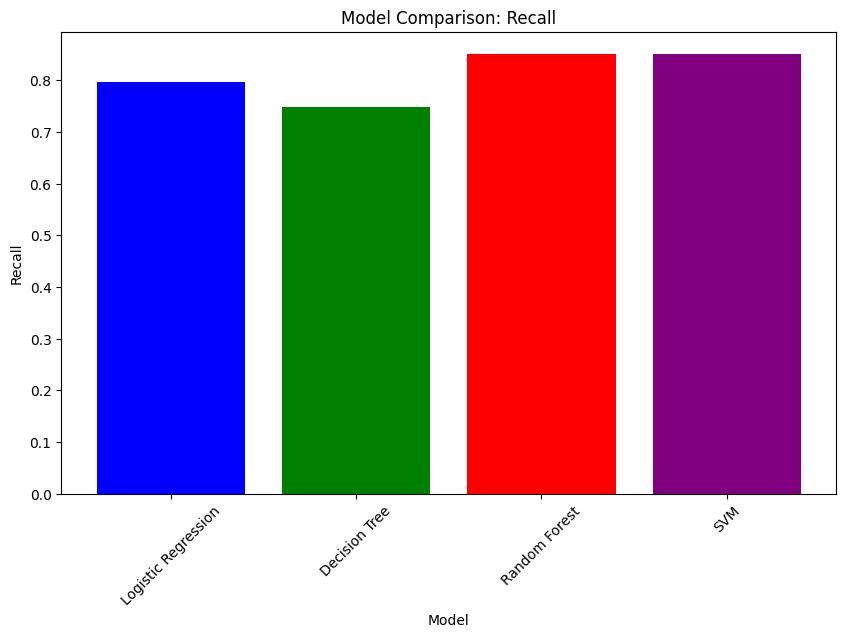

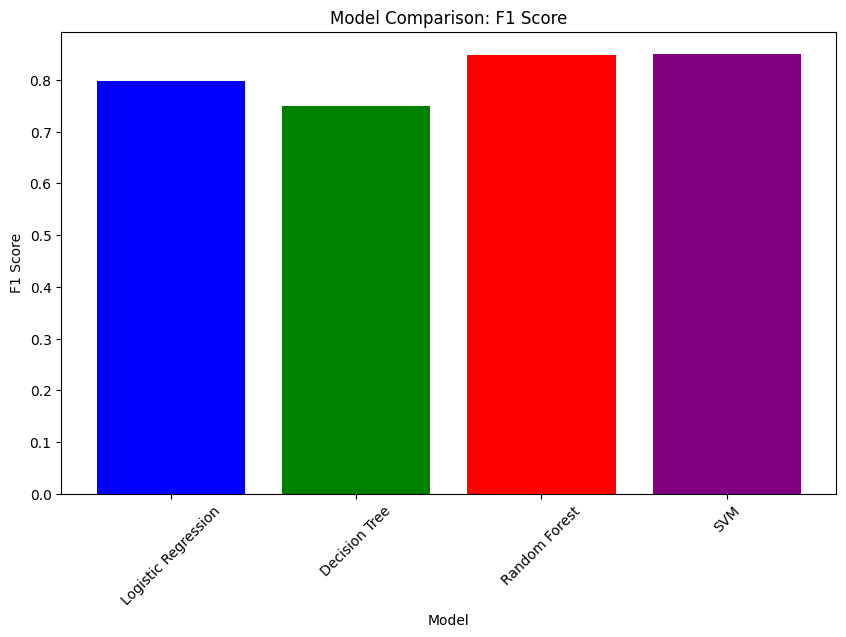

In [4]:
# Interpret and compare model metrics
import matplotlib.pyplot as plt

# Plot metrics for comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['blue', 'green', 'red', 'purple']  # Define a list of colors

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Model'], results_df[metric], color=colors) # Use the list of colors
    plt.title(f'Model Comparison: {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()


In [5]:
# Identify the best-performing model
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("Best Model:")
print(best_model)

Best Model:
Model             SVM
Accuracy       0.8511
Precision    0.850335
Recall         0.8511
F1 Score     0.850264
AUC           0.98641
Name: 3, dtype: object


In [10]:
# Use the best model to predict custom images
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Load custom images
# image_folder = './items'
# image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
# images = []

# for file in image_files:
#     img = Image.open(os.path.join(image_folder, file)).convert('L')  # Convert to grayscale
#     img = img.resize((28, 28))  # Resize to 28x28
#     images.append(np.array(img).flatten() / 255.0)  # Normalize pixel values

# # Visualize images
# plt.figure(figsize=(10, 10))
# for i, img in enumerate(images):
#     plt.subplot(1, len(images), i + 1)
#     plt.imshow(img.reshape(28, 28), cmap='gray')
#     plt.axis('off')
# plt.show()

# # Convert images to numpy array
# images = np.array(images)
# images = scaler.transform(images)  # Standardize using the same scaler

# # Predict labels using the best model
# best_model_name = best_model['Model']
# model = models[best_model_name]
# predictions = model.predict(images)

# Define class names for Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Display predictions
# for file, pred in zip(image_files, predictions):
#     print(f"Image: {file}, Predicted Label: {pred} ({class_names[pred]})")

Predictions on Random Images:
Image 1: Predicted Label: 2 (Pullover), True Label: 2 (Pullover)
Image 2: Predicted Label: 7 (Sneaker), True Label: 7 (Sneaker)
Image 3: Predicted Label: 7 (Sneaker), True Label: 7 (Sneaker)
Image 4: Predicted Label: 7 (Sneaker), True Label: 7 (Sneaker)
Image 5: Predicted Label: 5 (Sandal), True Label: 5 (Sandal)
Image 6: Predicted Label: 1 (Trouser), True Label: 1 (Trouser)
Image 7: Predicted Label: 1 (Trouser), True Label: 1 (Trouser)
Image 8: Predicted Label: 2 (Pullover), True Label: 6 (Shirt)
Image 9: Predicted Label: 1 (Trouser), True Label: 1 (Trouser)
Image 10: Predicted Label: 9 (Ankle boot), True Label: 9 (Ankle boot)


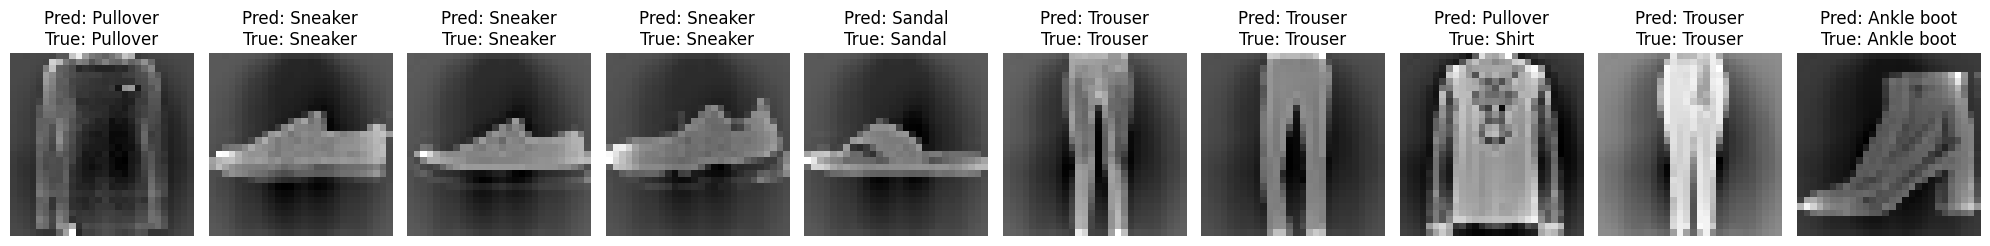

In [11]:
# Select random images from the test set
num_random_images = 10  # You can change this number
random_indices = np.random.choice(len(X_test), num_random_images, replace=False)
random_images = X_test[random_indices]
random_labels = y_test[random_indices]

# Predict labels using the best model
best_model_name = best_model['Model']
model = models[best_model_name]
random_predictions = model.predict(random_images)

# Display predictions and true labels
print("Predictions on Random Images:")
for i, (pred, true_label) in enumerate(zip(random_predictions, random_labels)):
    print(f"Image {i+1}: Predicted Label: {pred} ({class_names[pred]}), True Label: {true_label} ({class_names[true_label]})")

# Visualize the random images with their predicted and true labels
plt.figure(figsize=(num_random_images * 2, 4))  # Adjust figure size for horizontal layout
for i, img in enumerate(random_images):
    plt.subplot(1, num_random_images, i + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[random_predictions[i]]}\nTrue: {class_names[random_labels[i]]}")
    plt.axis('off')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [12]:
import pickle

# Get the best model from the dictionary
best_model_name = best_model['Model']
model_to_save = models[best_model_name]

# Save the model using pickle
filename = f'best_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model_to_save, file)

print(f"Best model saved as {filename}")

Best model saved as svm_model.pkl


In [13]:
from google.colab import files

# Download the saved model file
filename = 'best_model.pkl'
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>